In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv(r"E:\Tamizhan Skills\DATASETS\P4\covid_data.csv")

In [13]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths
3,2020-01-22,Brazil,0,0,0
2,2020-01-22,India,0,0,0
1,2020-01-22,Italy,0,0,0
0,2020-01-22,USA,1,0,0
7,2020-02-15,Brazil,0,0,0


In [14]:
df.tail()

,Date,Country,Confirmed,Recovered,Deaths
40,2020-11-15,USA,100000,40000,3000
47,2020-12-15,Brazil,25000,10000,900
46,2020-12-15,India,40000,18000,800
45,2020-12-15,Italy,2500,1200,120
44,2020-12-15,USA,150000,60000,5000


In [15]:
df.describe()

,Date,Confirmed,Recovered,Deaths
count,48,48.000000,48.000000,48.00000
mean,2020-06-30 22:00:00,20902.520833,7669.125000,589.43750
min,2020-01-22 00:00:00,0.000000,0.000000,0.00000
25%,2020-04-07 06:00:00,750.000000,175.000000,37.50000
50%,2020-06-30 00:00:00,4000.000000,1000.000000,150.00000
75%,2020-09-22 12:00:00,25000.000000,8500.000000,900.00000
max,2020-12-15 00:00:00,150000.000000,60000.000000,5000.00000
std,NaN,31378.740646,12276.172369,918.94655


In [16]:
df.shape

(48, 5)

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.fillna(0, inplace=True)

In [7]:
for col in ['Confirmed', 'Recovered', 'Deaths']:
    df[col] = df[col].clip(lower=0)

In [8]:
df = df.sort_values(['Date', 'Country'])

In [ ]:
df_cumulative = df.groupby(['Country', 'Date']).sum().groupby('Country').cumsum().reset_index()

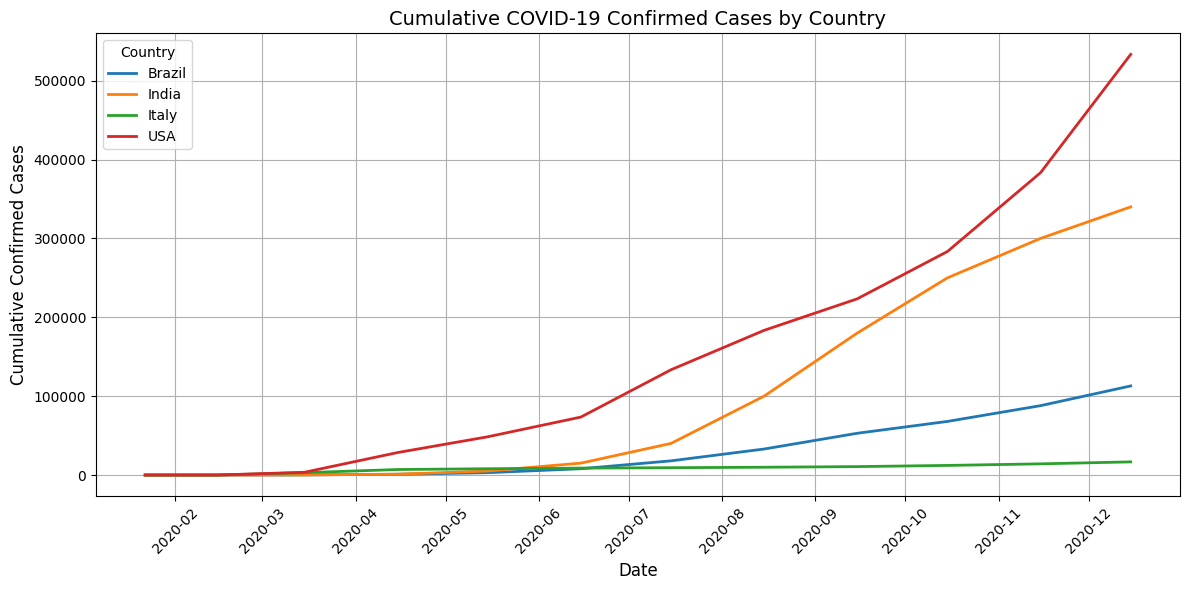

In [9]:
plt.figure(figsize=(12, 6))
for country in df_cumulative['Country'].unique():
    country_data = df_cumulative[df_cumulative['Country'] == country]
    plt.plot(country_data['Date'], country_data['Confirmed'], label=country, linewidth=2)
plt.title('Cumulative COVID-19 Confirmed Cases by Country', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Confirmed Cases', fontsize=12)
plt.legend(title='Country')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

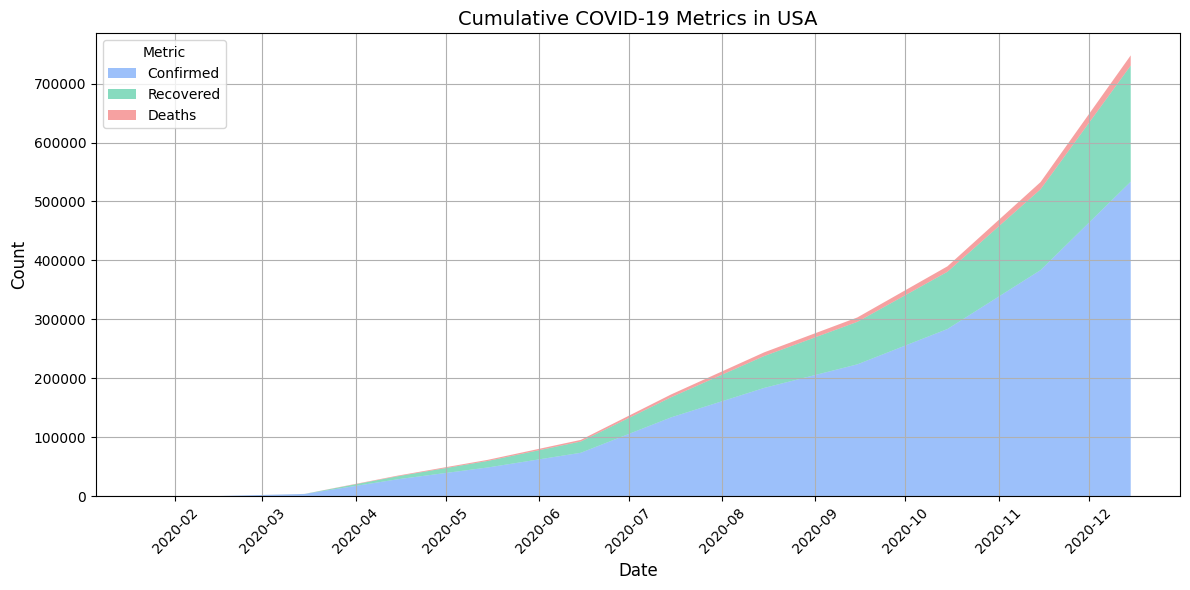

In [10]:
usa_data = df_cumulative[df_cumulative['Country'] == 'USA']
plt.figure(figsize=(12, 6))
plt.stackplot(usa_data['Date'], 
              usa_data['Confirmed'], usa_data['Recovered'], usa_data['Deaths'],
              labels=['Confirmed', 'Recovered', 'Deaths'],
              colors=['#3b82f6', '#10b981', '#ef4444'], alpha=0.5)
plt.title('Cumulative COVID-19 Metrics in USA', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(loc='upper left', title='Metric')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

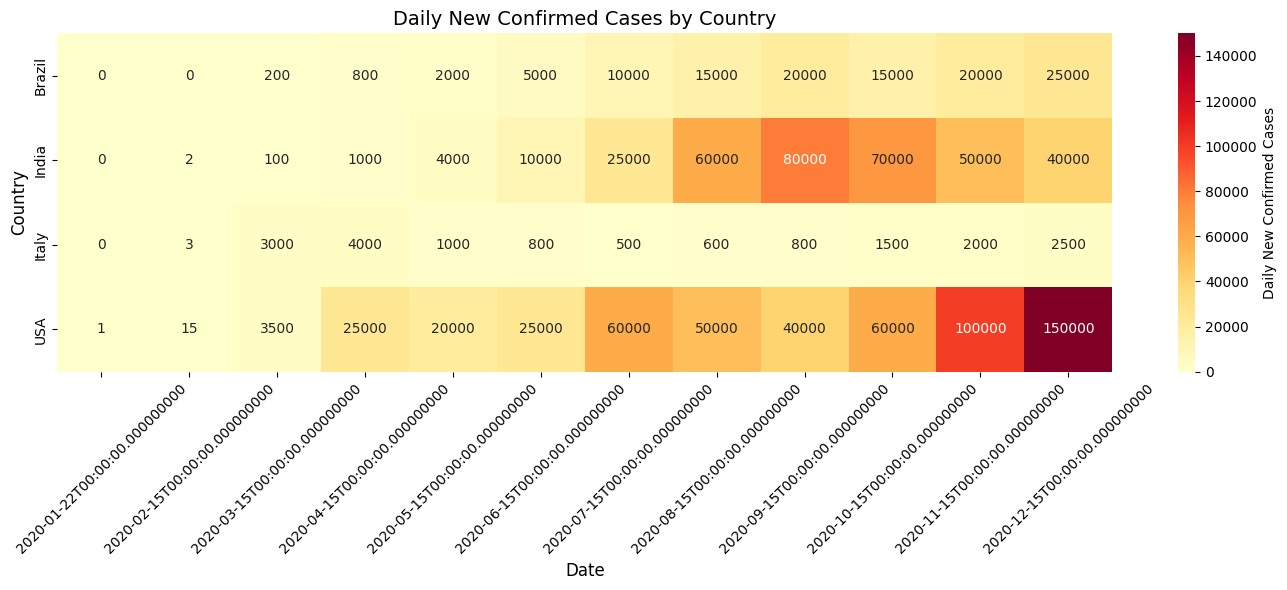

In [11]:
pivot_data = df.pivot(index='Country', columns='Date', values='Confirmed')
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_data, cmap='YlOrRd', annot=True, fmt='.0f', cbar_kws={'label': 'Daily New Confirmed Cases'})
plt.title('Daily New Confirmed Cases by Country', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
latest_date = df_cumulative['Date'].max()
print(f"Metrics for {latest_date.strftime('%B %d, %Y')}:")
for country in df_cumulative['Country'].unique():
    country_data = df_cumulative[(df_cumulative['Country'] == country) & (df_cumulative['Date'] == latest_date)]
    if not country_data.empty:
        confirmed = country_data['Confirmed'].iloc[0]
        recovered = country_data['Recovered'].iloc[0]
        deaths = country_data['Deaths'].iloc[0]
        cfr = (deaths / confirmed * 100) if confirmed > 0 else 0
        recovery_rate = (recovered / confirmed * 100) if confirmed > 0 else 0
        print(f"\n{country}:")
        print(f"  Cumulative Confirmed: {confirmed:,.0f}")
        print(f"  Cumulative Recovered: {recovered:,.0f}")
        print(f"  Cumulative Deaths: {deaths:,.0f}")
        print(f"  Case Fatality Rate: {cfr:.2f}%")
        print(f"  Recovery Rate: {recovery_rate:.2f}%")

Metrics for December 15, 2020:

Brazil:
  Cumulative Confirmed: 113,000
  Cumulative Recovered: 39,505
  Cumulative Deaths: 3,661
  Case Fatality Rate: 3.24%
  Recovery Rate: 34.96%

India:
  Cumulative Confirmed: 340,102
  Cumulative Recovered: 125,210
  Cumulative Deaths: 6,352
  Case Fatality Rate: 1.87%
  Recovery Rate: 36.82%

Italy:
  Cumulative Confirmed: 16,703
  Cumulative Recovered: 6,300
  Cumulative Deaths: 1,020
  Case Fatality Rate: 6.11%
  Recovery Rate: 37.72%

USA:
  Cumulative Confirmed: 533,516
  Cumulative Recovered: 197,103
  Cumulative Deaths: 17,260
  Case Fatality Rate: 3.24%
  Recovery Rate: 36.94%


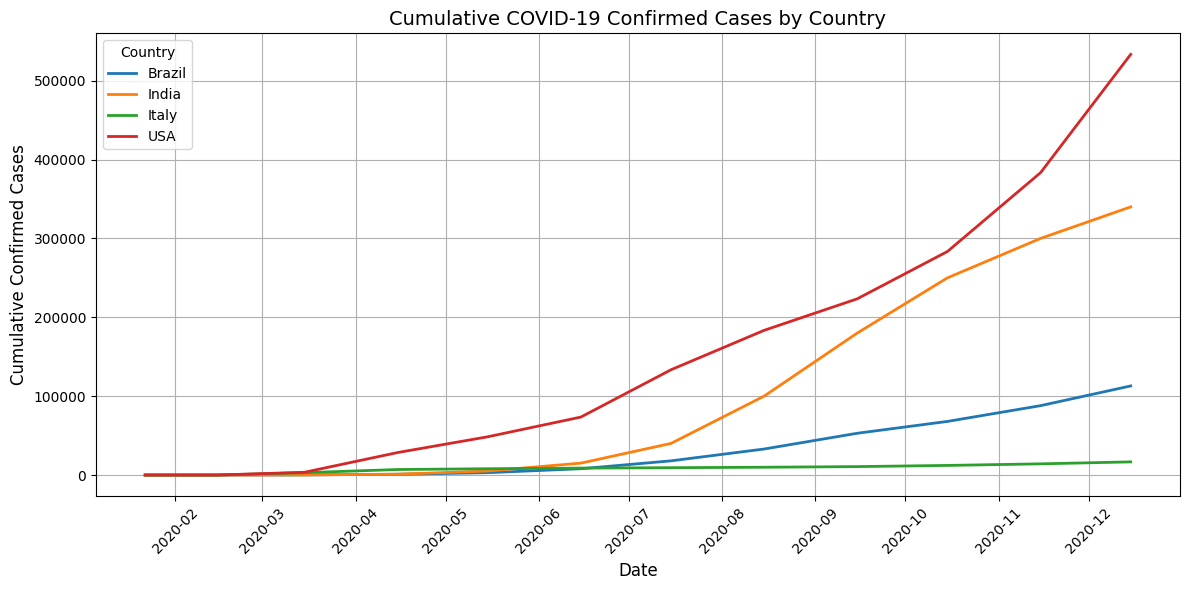

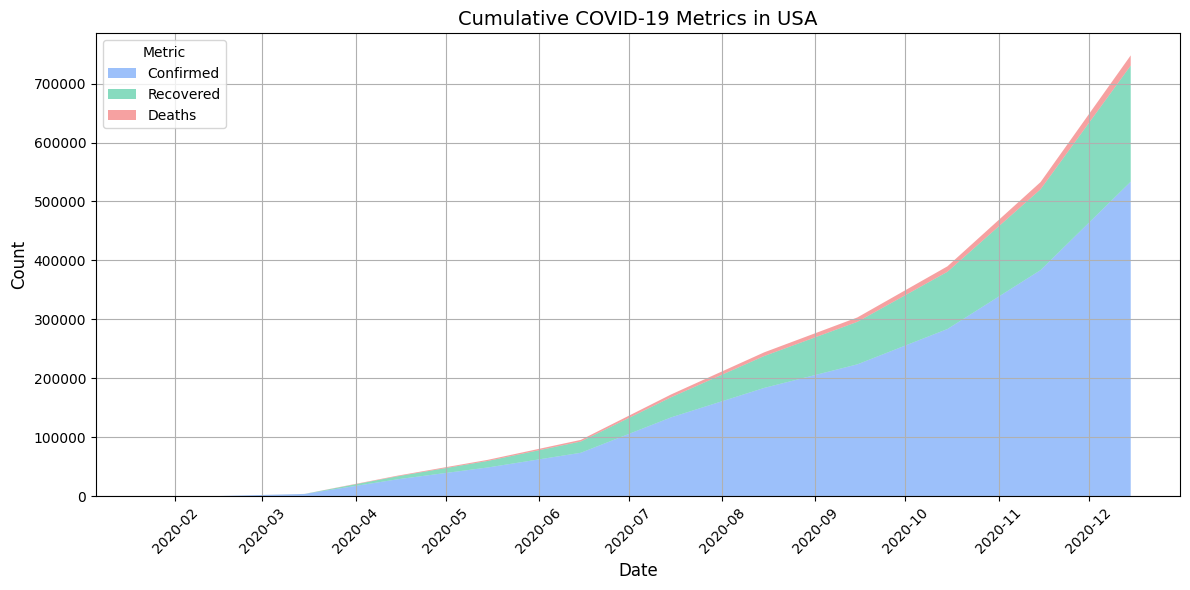

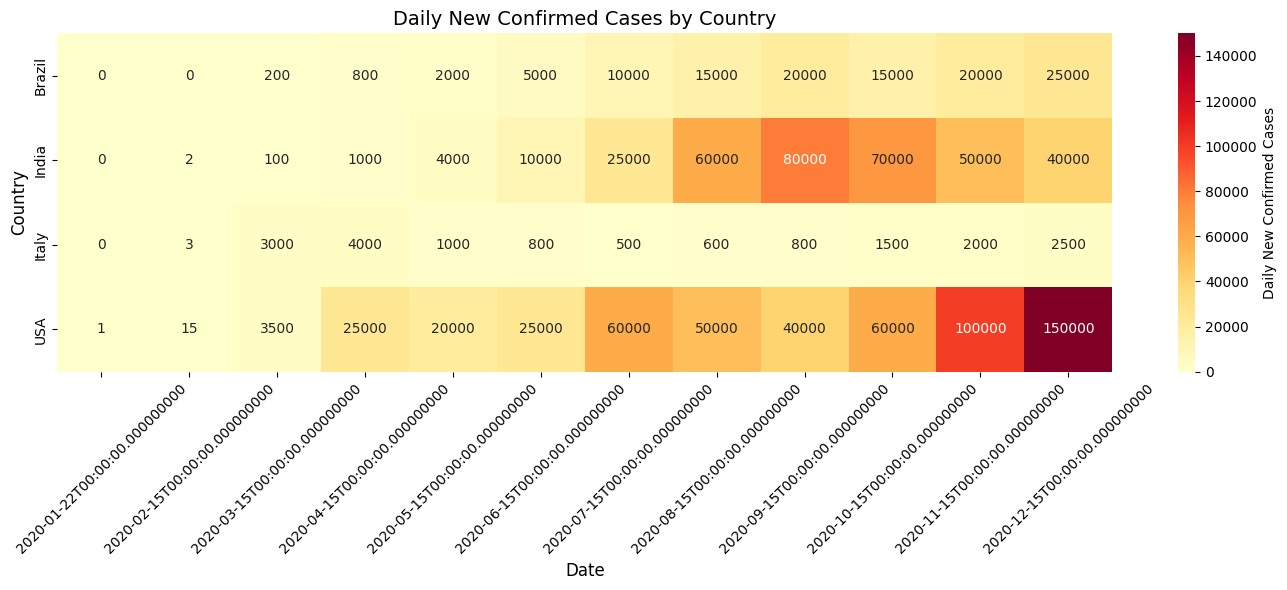

Metrics for December 15, 2020:

Brazil:
  Cumulative Confirmed: 113,000
  Cumulative Recovered: 39,505
  Cumulative Deaths: 3,661
  Case Fatality Rate: 3.24%
  Recovery Rate: 34.96%

India:
  Cumulative Confirmed: 340,102
  Cumulative Recovered: 125,210
  Cumulative Deaths: 6,352
  Case Fatality Rate: 1.87%
  Recovery Rate: 36.82%

Italy:
  Cumulative Confirmed: 16,703
  Cumulative Recovered: 6,300
  Cumulative Deaths: 1,020
  Case Fatality Rate: 6.11%
  Recovery Rate: 37.72%

USA:
  Cumulative Confirmed: 533,516
  Cumulative Recovered: 197,103
  Cumulative Deaths: 17,260
  Case Fatality Rate: 3.24%
  Recovery Rate: 36.94%


In [2]:

# Load the CSV data

# Data Cleaning
# Convert Date to datetime


# Check for missing values and fill with 0


# Ensure no negative values


# Sort by Date and Country


# Calculate cumulative sums per country


# Visualization 1: Line Plot of Cumulative Confirmed Cases


# Visualization 2: Stacked Area Chart for USA


# Visualization 3: Heatmap of Daily New Confirmed Cases


# Calculate and print additional metrics for the latest date
